In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [33]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [34]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [35]:
X = X.drop(['Geography', 'Gender'], axis = 1)

In [36]:
X = pd.concat([X,geography, gender],axis=1)

In [37]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
X_train.shape

(8000, 11)

In [45]:
 X_test.shape

(2000, 11)

In [46]:
# ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU, LeakyReLU

In [47]:
ann_model = Sequential()

In [49]:
#input layer

ann_model.add(Dense(units =11, activation='relu'))

In [50]:
#1st hidden layer
ann_model.add(Dense(units=7, activation = 'relu'))
ann_model.add(Dropout(0.25))

In [51]:
#2nd Hidden layer

ann_model.add(Dense(units = 6, activation='relu'))
ann_model.add(Dropout(0.30))

In [52]:
#add output layer

ann_model.add(Dense(1, activation='sigmoid'))

In [53]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [54]:
#compile
ann_model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])

In [57]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [58]:
model_history = ann_model.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.4731 - accuracy: 0.7931 - val_loss: 0.4264 - val_accuracy: 0.8023
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4509 - accuracy: 0.7947 - val_loss: 0.4022 - val_accuracy: 0.8023
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4290 - accuracy: 0.7947 - val_loss: 0.3874 - val_accuracy: 0.8023
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4208 - accuracy: 0.7959 - val_loss: 0.3848 - val_accuracy: 0.8023
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4076 - accuracy: 0.8317 - val_loss: 0.3715 - val_accuracy: 0.8527
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4075 - accuracy: 0.8405 - val_loss: 0.3784 - val_accuracy: 0.8485
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4115 - accuracy: 0.8459 - val_loss: 0.3746 - val_accuracy: 0.8489

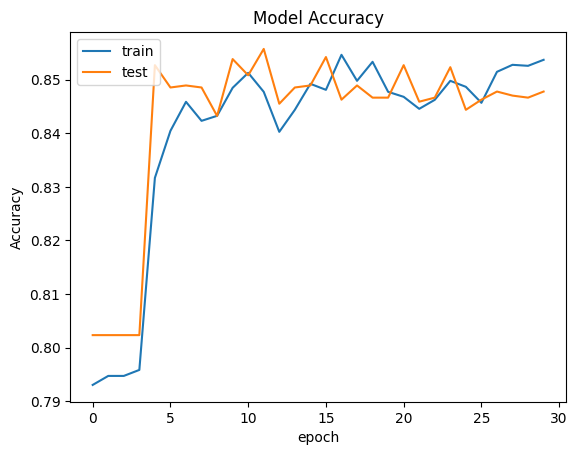

In [66]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left' )
plt.show()

In [67]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.94      0.89      0.91      1691
        True       0.53      0.72      0.61       309

    accuracy                           0.86      2000
   macro avg       0.74      0.80      0.76      2000
weighted avg       0.88      0.86      0.87      2000



In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.859
